<a href="https://colab.research.google.com/github/aroosrasool/codecasa_projects/blob/main/MovieRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
movie_datasheet = pd.read_csv('/content/movies (1).csv')

In [54]:
movie_datasheet.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


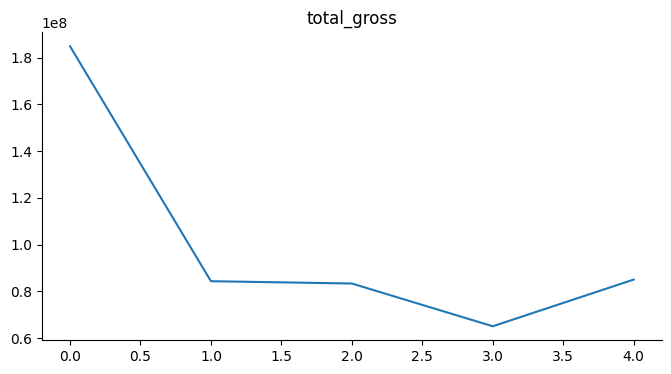

In [53]:
from matplotlib import pyplot as plt
_df_10['total_gross'].plot(kind='line', figsize=(8, 4), title='total_gross')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
movie_datasheet.shape

(1000, 14)

In [55]:
chosen_features = ['genres','keywords', 'tagline', 'cast']
print(chosen_features)

['genres', 'keywords', 'tagline', 'cast']


In [56]:
for feature in chosen_features:
  movie_datasheet[feature] = movie_datasheet[feature].fillna('')

In [57]:
resultant_features = movie_datasheet['genres'] + '   ' + movie_datasheet['keywords'] +'   ' + movie_datasheet['tagline']+ ' ' + movie_datasheet['cast']

In [58]:
vectorizer = TfidfVectorizer()

In [59]:
f_vectors = vectorizer.fit_transform(resultant_features)

In [60]:
print(f_vectors)

  (0, 11944)	0.2179541049534567
  (0, 9358)	0.16220625760325083
  (0, 8035)	0.24268136037924426
  (0, 13376)	0.1679762975847774
  (0, 15268)	0.20043369094168031
  (0, 12876)	0.2080378726062569
  (0, 12211)	0.21994287729015155
  (0, 15836)	0.20401594060427147
  (0, 15585)	0.23881752360753422
  (0, 12235)	0.16150825899870827
  (0, 10522)	0.2748571666270283
  (0, 10234)	0.09140575746628334
  (0, 15576)	0.12950556500906077
  (0, 13980)	0.0716738996919006
  (0, 4570)	0.24268136037924426
  (0, 13069)	0.2160790405184415
  (0, 2965)	0.2521186835379356
  (0, 15189)	0.12675984407319427
  (0, 13166)	0.3430524228349123
  (0, 5381)	0.16633572090148666
  (0, 2817)	0.22432333413714167
  (0, 3392)	0.2160790405184415
  (0, 5022)	0.1046865481338198
  (0, 12451)	0.1046865481338198
  (0, 4878)	0.11220584657020999
  :	:
  (4801, 15819)	0.31669946803986226
  (4801, 4465)	0.2711909206056166
  (4801, 385)	0.20162062799136785
  (4801, 6373)	0.31669946803986226
  (4801, 10669)	0.23809938363906946
  (4801, 1533)

In [61]:
resemblence = cosine_similarity(f_vectors)

In [62]:
print(resemblence)


[[1.         0.07580156 0.01525023 ... 0.         0.         0.        ]
 [0.07580156 1.         0.03515988 ... 0.03787357 0.         0.        ]
 [0.01525023 0.03515988 1.         ... 0.         0.03266233 0.        ]
 ...
 [0.         0.03787357 0.         ... 1.         0.         0.0354845 ]
 [0.         0.         0.03266233 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.0354845  0.         1.        ]]


In [75]:
movie_names = movie_datasheet['title'].tolist()

In [76]:
print(movie_names)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [66]:
print(np.transpose(movie_names))

['Avatar' "Pirates of the Caribbean: At World's End" 'Spectre' ...
 'Signed, Sealed, Delivered' 'Shanghai Calling' 'My Date with Drew']


In [93]:
movie_name = input('ENTER THE NAME OF MOVIE: ')

ENTER THE NAME OF MOVIE: avengers


In [94]:
find_close_match = difflib.get_close_matches(movie_name, movie_names)
print(find_close_match)

['The Avengers', 'Savages', 'Swingers']


In [71]:
close_match = find_close_match[0]
print(close_match)

The Avengers


In [74]:
index_of_the_movie = movie_datasheet[movie_datasheet.title == close_match]['index'].values[0]
print(index_of_the_movie)

16


In [79]:
similarity_score = list(enumerate(resemblence[index_of_the_movie]))
print(similarity_score)

[(0, 0.036579098866264266), (1, 0.020607848713532783), (2, 0.04257548638185804), (3, 0.00725876230575368), (4, 0.06264138400696226), (5, 0.015582360848569583), (6, 0.02621516219684375), (7, 0.7596541877443815), (8, 0.008791346815780591), (9, 0.18062054809382005), (10, 0.08549501694149372), (11, 0.013256514174083758), (12, 0.015591999140251566), (13, 0.013906884134615122), (14, 0.20470772666135317), (15, 0.05030013471087148), (16, 1.0000000000000002), (17, 0.014509952964697988), (18, 0.027722947101320988), (19, 0.012699513239463858), (20, 0.12288972795132583), (21, 0.030995808157504766), (22, 0.007525754738844615), (23, 0.007261106169135594), (24, 0.013913570712313306), (25, 0.011583389324686399), (26, 0.46427591171005983), (27, 0.03387084616481784), (28, 0.08062372511023086), (29, 0.02783090109978549), (30, 0.12411613012759547), (31, 0.23733131655544248), (32, 0.03237965903304787), (33, 0.2782159653900317), (34, 0.0), (35, 0.0393373695724137), (36, 0.05637231705628813), (37, 0.00896594

In [83]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
print(sorted_similar_movies)

[(16, 1.0000000000000002), (7, 0.7596541877443815), (85, 0.48014048788554636), (26, 0.46427591171005983), (79, 0.4308680888869295), (126, 0.3410785009282357), (511, 0.31909564092904324), (174, 0.3135426388588925), (129, 0.30169256607648215), (64, 0.30142093114934065), (182, 0.2970934491553504), (203, 0.280436601144769), (33, 0.2782159653900317), (788, 0.26872577921083535), (169, 0.26392661163437825), (46, 0.2630328492902054), (38, 0.25695723290529493), (68, 0.2497087159811444), (4759, 0.24772831403578616), (31, 0.23733131655544248), (14, 0.20470772666135317), (870, 0.19841673602514698), (782, 0.19731793581167864), (101, 0.19688109246949662), (94, 0.18203498056227166), (9, 0.18062054809382005), (700, 0.16544814792291054), (241, 0.16425706321439626), (122, 0.16066335947335783), (1720, 0.16042019091625104), (1740, 0.15919040421731764), (242, 0.157371021497366), (4401, 0.15648084362971498), (1382, 0.1559220435693317), (713, 0.1557856823908968), (421, 0.15379618062020123), (2197, 0.15106682

In [95]:
print('MOVIES SUGGESTED:')

i = 1
for movie in sorted_similar_movies:
 index = movie[0]
 title_from_index = movie_datasheet[movie_datasheet.index == index]['title'].values[0]
 if (i<30):
  print(i, '.', title_from_index)
  i+=1

MOVIES SUGGESTED:
1 . The Avengers
2 . Avengers: Age of Ultron
3 . Captain America: The Winter Soldier
4 . Captain America: Civil War
5 . Iron Man 2
6 . Thor: The Dark World
7 . X-Men
8 . The Incredible Hulk
9 . Thor
10 . X-Men: Apocalypse
11 . Ant-Man
12 . X2
13 . X-Men: The Last Stand
14 . Deadpool
15 . Captain America: The First Avenger
16 . X-Men: Days of Future Past
17 . The Amazing Spider-Man 2
18 . Iron Man
19 . The Image Revolution
20 . Iron Man 3
21 . Man of Steel
22 . Superman II
23 . The Spirit
24 . X-Men: First Class
25 . Guardians of the Galaxy
26 . Batman v Superman: Dawn of Justice
27 . 2 Guns
28 . Teenage Mutant Ninja Turtles: Out of the Shadows
29 . X-Men Origins: Wolverine


In [97]:
movie_name = input('ENTER THE NAME OF MOVIE: ')
find_close_match = difflib.get_close_matches(movie_name, movie_names)

close_match = find_close_match[0]

index_of_the_movie = movie_datasheet[movie_datasheet.title == close_match]['index'].values[0]

similarity_score = list(enumerate(resemblence[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('MOVIES SUGGESTED:')

i = 1
for movie in sorted_similar_movies:
 index = movie[0]
 title_from_index = movie_datasheet[movie_datasheet.index == index]['title'].values[0]
 if (i<30):
  print(i, '.', title_from_index)
  i+=1


ENTER THE NAME OF MOVIE: spider man
MOVIES SUGGESTED:
1 . Spider-Man
2 . Spider-Man 3
3 . Spider-Man 2
4 . Clerks II
5 . Seabiscuit
6 . The Notebook
7 . The Ice Storm
8 . Horrible Bosses
9 . The Count of Monte Cristo
10 . In Good Company
11 . Clear and Present Danger
12 . Finding Nemo
13 . The Good German
14 . Bambi
15 . The Queen
16 . Charly
17 . Escape from L.A.
18 . Labor Day
19 . The Life Aquatic with Steve Zissou
20 . Brothers
21 . Malone
22 . Melancholia
23 . Bullets Over Broadway
24 . Dick
25 . Cold Mountain
26 . Hearts in Atlantis
27 . Drop Dead Gorgeous
28 . Wonder Boys
29 . Highlander: Endgame
